In [1]:
%matplotlib notebook
import ipywidgets as widgets
import sys, os, io, string, shutil, math
import hublib.rappture as Rappture
from hublib.cmd import runCommand
from hubzero.submit.SubmitCommand import SubmitCommand
import matplotlib.pyplot as plt
import time
from threading import Thread
style = {'description_width': 'initial'}

In [2]:
salt = widgets.BoundedFloatText(
    value=0.5,
    min=0.3,
    max=0.9,
    step=0.1,
    description='Salt Concentration (c in M):',
    style=style,
)
salt

BoundedFloatText(value=0.5, description='Salt Concentration (c in M):', max=0.9, min=0.3, step=0.1, style=DescriptionStyle(description_width='initial'))

In [3]:
pion = widgets.Dropdown(
    options={'1(monovalent)': 1, '2(divalent)': 2, '3(trivalent)': 3},
    value=1,
    description="Positive Ion Valency (z)",
    style=style
)
pion

Dropdown(description='Positive Ion Valency (z)', options={'1(monovalent)': 1, '2(divalent)': 2, '3(trivalent)': 3}, style=DescriptionStyle(description_width='initial'), value=1)

In [4]:
nion = widgets.Dropdown(
    options=[-1, -2, -3],
    value=-1,
    description="Negative Ion Valency",
    style=style
)
nion

Dropdown(description='Negative Ion Valency', options=(-1, -2, -3), style=DescriptionStyle(description_width='initial'), value=-1)

In [5]:
clen = widgets.BoundedFloatText(
    value=3,
    min=2,
    max=4,
    step=0.1,
    description='Confinement Length (nm):',
    style=style
)
clen

BoundedFloatText(value=3.0, description='Confinement Length (nm):', max=4.0, min=2.0, step=0.1, style=DescriptionStyle(description_width='initial'))

In [6]:
ion_diam = widgets.BoundedFloatText(
    value=.714,
    min=.5,
    max=.8,
    step=0.001,
    description='Ion Diameter (nm):',
    style=style
)
ion_diam

BoundedFloatText(value=0.714, description='Ion Diameter (nm):', max=0.8, min=0.5, step=0.001, style=DescriptionStyle(description_width='initial'))

In [7]:
steps = widgets.BoundedIntText(
    value=20000,
    min=20000,
    max=5000000,
    step=100000,
    description='Simulation Steps:',
    style=style,
)
steps

BoundedIntText(value=20000, description='Simulation Steps:', max=5000000, min=20000, step=100000, style=DescriptionStyle(description_width='initial'))

In [8]:
label_style = "style='background-color: #DCDCDC; font-size:200; padding: 5px'"
def make_label(name, desc=""):
    lval = '<p  %s %s>%s</p>' % (desc, label_style, name)
    return widgets.HTML(lval)

plabel = make_label('Physical', '')
clabel = make_label('Computing', '')

In [9]:
image_html = widgets.HTML(
    value='<img src="webcontent/images/overview.jpg" style="width: 500px"/>',
)
image_html

HTML(value='<img src="webcontent/images/overview.jpg" style="width: 500px"/>')

In [10]:
about=widgets.Textarea(
    value='This app enables users to simulate ions confined between nanoparticle (NP) surfaces in aqueous media. Nanoparticles can be synthetic (such as gold NPs) or natural (e.g. proteins) and the length of confinement is of the order of nanometers. Example systems include ion channel proteins of the cell membrane, adsorbed ions near surfaces of porous electrodes, and ions confined by NPs and/or colloidal particles. NP surfaces are assumed to be unpolarizable and are modeled as planar interfaces considering the large size difference between the ions and the NPs. \nThe app facilitates investigations for a wide array of ionic and environmental parameters. Users can extract the ionic structure (density profile) and study its dependence on salt concentration (c), ion valency (z), and other physical attributes. \nUsers can explore interesting effects by changing the c parameter from 0.3 to 0.9 M. This increase in density leads to crowding of the channel (confinement) with a large number of ions. The effect of symmetry breaking caused by the surfaces is seen: to avoid being pushed by ions from both the sides, an ion prefers the interface over the central region (bulk). The app enables users to explore this effect of ion accumulation near the interface, and make a quantitative assessment of ionic structure in strong confinement.\nAnother rich avenue to explore is to tune the valency of positive ions (parameter z) from 1 to 3. A positively-charged multivalent ion (+3 Fe or +2 Ca) near an interface is pulled away from the interface by oppositely charged ions with a stronger force relative to the bulk where the symmetry allows for no preferred movement. Thus, stronger electrostatic interactions (as in the case of multivalent ions) tend to cause depletion of the ions from the interface. This app empowers users to investigate this depletion effect via accurate computation of the density profiles of ions. \nEffects of changing other physical attributes such as confinement length and ion size are also available for users to explore. We invite users to take an inside look at what happens to the self-assembly of ions in these nanoscale channels by investigating the interplay of electrostatic effects and steric (or entropic) effects caused due to confinement, and measuring associated density profiles. \nWhile we provide a default of 20000 steps for users to get started on exploring different features of the app by obtaining immediate results, converged results of smooth profiles are expected for around 1 million steps.',
    placeholder='',
    layout={'height': '150px','width': '100%'},
    disabled=True
)
about

Textarea(value='This app enables users to simulate ions confined between nanoparticle (NP) surfaces in aqueous media. Nanoparticles can be synthetic (such as gold NPs) or natural (e.g. proteins) and the length of confinement is of the order of nanometers. Example systems include ion channel proteins of the cell membrane, adsorbed ions near surfaces of porous electrodes, and ions confined by NPs and/or colloidal particles. NP surfaces are assumed to be unpolarizable and are modeled as planar interfaces considering the large size difference between the ions and the NPs. \nThe app facilitates investigations for a wide array of ionic and environmental parameters. Users can extract the ionic structure (density profile) and study its dependence on salt concentration (c), ion valency (z), and other physical attributes. \nUsers can explore interesting effects by changing the c parameter from 0.3 to 0.9 M. This increase in density leads to crowding of the channel (confinement) with a large number of ions. The effect of symmetry breaking caused by the surfaces is seen: to avoid being pushed by ions from both the sides, an ion prefers the interface over the central region (bulk). The app enables users to explore this effect of ion accumulation near the interface, and make a quantitative assessment of ionic structure in strong confinement.\nAnother rich avenue to explore is to tune the valency of positive ions (parameter z) from 1 to 3. A positively-charged multivalent ion (+3 Fe or +2 Ca) near an interface is pulled away from the interface by oppositely charged ions with a stronger force relative to the bulk where the symmetry allows for no preferred movement. Thus, stronger electrostatic interactions (as in the case of multivalent ions) tend to cause depletion of the ions from the interface. This app empowers users to investigate this depletion effect via accurate computation of the density profiles of ions. \nEffects of changing other physical attributes such as confinement length and ion size are also available for users to explore. We invite users to take an inside look at what happens to the self-assembly of ions in these nanoscale channels by investigating the interplay of electrostatic effects and steric (or entropic) effects caused due to confinement, and measuring associated density profiles. \nWhile we provide a default of 20000 steps for users to get started on exploring different features of the app by obtaining immediate results, converged results of smooth profiles are expected for around 1 million steps.', disabled=True, layout=Layout(height='150px', width='100%'), placeholder='')

In [11]:
def but_cb(change):
    global pdX, pdY, logoutput
    but.disabled=True
    output.disabled=True
    clearoutputs()
    #setting stdout again to a file
    sys.stdout = open('stdlog.txt', 'w')
    #progress bar and live feedback thread
    t2 = Thread(target=grabStdOut)
    t2.start()
    callExe()
    t2.join()
    stdOutText.value=logoutput
    #sys.stdout.close()
    #os.remove('stdlog.txt')
    output.disabled=False
    but.disabled=False
    plot('Positive density Profie', 'Distribution of positive ions confined within the nanoparticle surfaces', pdX, pdY,1)


In [12]:
but = widgets.Button(description='Simulate')
outputs = but.on_click(but_cb)
but

Button(description='Simulate', style=ButtonStyle())

In [13]:
def clearoutputs():
    global fig
    stdOutText.value = ''
    stdOutSubmitText.value = ''
    progressBar.value=0
    fig = plt.figure('Outputs')
    

In [14]:
def grabStdOut():
    global runFlag
    while runFlag:
        logfile = open('stdlog.txt','r')
        loglines = follow(logfile)
        for line in loglines:
            if not line.startswith('=RAPPTURE-PROGRESS'):
                stdOutSubmitText.value=stdOutSubmitText.value + line
            else:
                percent = (line.split('=RAPPTURE-PROGRESS=>'))[1].split(' Simulation Running...')[0]
                progressBar.value=int(percent)
        time.sleep(0.1)
        logfile.close()
    progressBar.value=100
    
def follow(thefile):
    global runFlag
    thefile.seek(0,2)
    while runFlag:
        line = thefile.readline()
        if not line:
            time.sleep(0.1)
            continue
        yield line
    

In [15]:
pdX=[]
pdY=[]
ndX=[]
ndY=[]
logoutput = ''
runFlag=True
stdoutputarry=[]
def callExe():
    
    global pdX, pdY, ndX, ndY, logoutput, runFlag
    
    salt_concentration = salt.value
    positive_valency = pion.value
    negative_valency = nion.value
    confinement_length = clen.value
    ion_diameter = ion_diam.value
    simulation_steps = steps.value
    simulation_params="_%.2f" % float(confinement_length)+"_%d" % int(positive_valency)+"_%d" % int(negative_valency)+"_%.2f" % float(salt_concentration)+"_%.3f" % float(ion_diameter)+"_%d" % int(simulation_steps);

    mpi_processors=int(round((int(simulation_steps) + 333333)/333333))
    total_processors=str(int(mpi_processors*16))

    #walltime = str(int(round((16*(1+(5.25 * math.exp(-mpi_processors/1.78)))))))
    walltime=str(int(round((int(simulation_steps) + 40000)/40000)+2))
     
    print("Salt concentration is", salt_concentration)
    print("Positive Ion Valency is", positive_valency)
    print("Negative Ion Valency is", negative_valency)
    print("confinement length is", confinement_length)
    print("Ion diameter is", ion_diameter)
    print("simulation steps is", simulation_steps)
    print("simulation_params is", simulation_params)
    print ("Requested walltime is ",walltime)
    print ("Requested total_processors are ", total_processors)
    
    shutil.rmtree('data',True)
    if not os.path.exists('data'):
        os.makedirs('data')

    #os.system("use boost-1.62.0-mpich2-1.3-gnu-4.7.2")

    runName='nanoconfine'
     
    try:
        submitCommand = SubmitCommand()
        result = submitCommand.submit(['--venue','standby@conte','-w',walltime,'-n',str(total_processors), '-N','16', '--runName',runName, '--tailStdout', '--inputfile','data', 'nanoconfinement-r27',
             '-Z', str(confinement_length), '-p', str(positive_valency), '-n', str(negative_valency), '-c', str(salt_concentration),
             '-d', str(ion_diameter), '-S', str(simulation_steps), '-f', str(simulation_params), '-v', 'false'])
        
        time.sleep(2)
        runFlag= False    
        
    except  Exception as e:
        sys.stderr.write('Error during execution of md_simulation_confined_ions')
        sys.stderr.write(str(e))
        runFlag= False
        sys.exit(1)
        
    # Reading standard output from the file
    try:
        fid = open(runName+'.stdout','r')
        info = fid.readlines()
        fid.close()
        os.remove(runName+'.stdout') 
    except:
        sys.stderr.write('Can not find the .stdout file')
        sys.exit(1);
    
    stdoutProcessed=[]
    
    for line in info:
        if not line.startswith('=RAPPTURE-PROGRESS'):
            stdoutProcessed.append(line)
    
    # Setting standard output
    logoutput='\n'.join(stdoutProcessed)
    
    try:
        fid = open('data/p_density_profile'+simulation_params+'.dat','r')
        info = fid.readlines()
        fid.close()
        os.remove('data/p_density_profile'+simulation_params+'.dat') 
    except:
        sys.stderr.write('Can not find the positive density results file')
        sys.exit(1);

   # add density profile to xy data
    
    for line in info:
        proLine=" ".join(line.split())
        d,m,e = proLine.split()
        pdX.append(float(d))
        pdY.append(float(m))
        
    try:
        fid = open('data/n_density_profile'+simulation_params+'.dat','r')
        info = fid.readlines()
        fid.close()
        os.remove('data/n_density_profile'+simulation_params+'.dat') 
    except:
        sys.stderr.write('Can not find the negative density results file')
        sys.exit(1);

   # add density profile to xy data
    
    for line in info:
        proLine=" ".join(line.split())
        d,m,e = proLine.split()
        ndX.append(float(d))
        ndY.append(float(m))
    

<IPython.core.display.Javascript object>


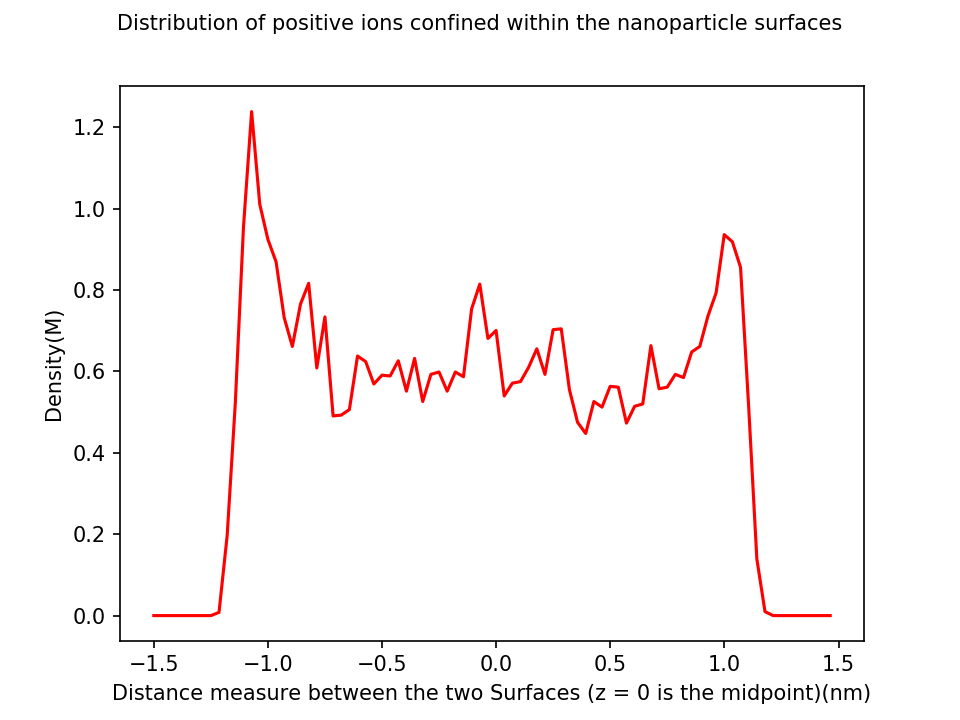

In [16]:
outPlots=plt.ion()
fig = plt.figure('Outputs')

def plot(name='',suptitle='', xList=[], yList=[],value=1):
    global fig
    fig.suptitle(name, fontsize=20)
    plt.xlabel('xlabel', fontsize=18)
    plt.ylabel('ylabel', fontsize=16)
    fig.canvas.set_window_title(name)
    fig.clf()
    ax = fig.add_subplot(111)
    if value==1:
        ax.plot(xList, yList, 'r-')
    elif value==2:
        ax.plot(xList, yList, 'b-')
    else:
        print('stdoutput')
    fig.suptitle(suptitle, fontsize=10)
    plt.xlabel('Distance measure between the two Surfaces (z = 0 is the midpoint)(nm)', fontsize=10)
    plt.ylabel('Density(M)', fontsize=10)
    plt.show()

def complexPlot(name='',suptitle='', xList=[], yList=[],xList2=[], yList2=[]):
    global fig
    fig.suptitle(name, fontsize=20)
    plt.xlabel('xlabel', fontsize=18)
    plt.ylabel('ylabel', fontsize=16)
    fig.canvas.set_window_title(name)
    fig.clf()
    ax = fig.add_subplot(111)
    ax.plot(xList, yList, 'r-', label='Positive density')
    ax.plot(xList2, yList2, 'b--', label='Negative density')
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-small')
    fig.suptitle(suptitle, fontsize=10)
    plt.xlabel('Distance measure between the two Surfaces (z = 0 is the midpoint)(nm)', fontsize=10)
    plt.ylabel('Density(M)', fontsize=10)
    plt.show()    


In [17]:
progressBar=widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Progress:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal',
    layout={'width': '100%'},
)
progressBar


IntProgress(value=0, description='Progress:', layout=Layout(width='100%'))

In [18]:
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global pdX, pdY, ndX, ndY, logoutput
        if change['new']==1:
            plot('Positive density Profie', 'Distribution of positive ions confined within the nanoparticle surfaces', pdX, pdY,1)
        elif change['new']==2:
            plot('Negative density Profie', 'Distribution of negative ions confined within the nanoparticle surfaces', ndX, ndY,2)
        elif change['new']==3:
            complexPlot('Positive/negative density Profie', 'Distribution of positive/negative ions confined within the nanoparticle surfaces', pdX, pdY, ndX, ndY)
        else:
            stdOutText.value=logoutput

In [19]:
output = widgets.Dropdown(
    name='Outputs',
    options={'Positive density Profie': 1, 'Negaitive density Profie': 2,  'Positive/Negaitive density Profie': 3},
    value=1,
    description="Output plots",
    style=style,
    disabled=True
)
output.observe(on_change)
output


Dropdown(description='Output plots', disabled=True, options={'Positive density Profie': 1, 'Negaitive density Profie': 2, 'Positive/Negaitive density Profie': 3}, style=DescriptionStyle(description_width='initial'), value=1)

In [20]:
stdOutSubmitText=widgets.Textarea(
    value='',
    placeholder='Job execution messages is here',
    layout={'height': '400px'},
    disabled=False
)
stdOutSubmitText

Textarea(value='', layout=Layout(height='400px'), placeholder='Job execution messages is here')

In [21]:
stdOutText=widgets.Textarea(
    value='',
    placeholder='Simulation output is here',
    layout={'height': '400px'},
    disabled=False
)
stdOutText

Textarea(value='', layout=Layout(height='400px'), placeholder='Simulation output is here')

In [22]:

#widgets.VBox([plabel, salt, pion, nion, clen, ion_diam, clabel, steps, image_html, but, progressBar, out])